** **
## Project Pulse, AI and Support Systems 
May, 2021
** **

Support systems house valuable data and information that can be leveraged to better inform customer education teams on their content strategy.  By surfacing areas within a product where end users are experiencing friction, signaled by end-user requests for help, and overlaying with opportunities to improve or create additional training content, customer education teams are able to significantly impove key metrics related to customer adoption, engagement, ticket deflection and retention.  However, due to the sheer volume of support tickets and the fact that support systems are typically siloed and not readily accessible to departments outside of the support organization, it’s challenging and time consuming for customer education personnel to access and analyze the large volumes of tickets required to extract meaningful and actionable data.

#### Goal
The overarching goal of Project Pulse is to provide actionable insights that aid in improving customer education. Support systems house treasuretroves of valuable information buried, hidden and often inaccessible to those outside the support derpartment. It is here where machine learning and artificial intelligence technologies can be utilized to uncover and unleash these buried treasuetroves. Therefore, a goal is to address this challenge by creating a solution that will quickly and easily identify key topics related to product friction masked in support systems without the manually intensive need to visually read through and self analyze individual tickets.

#### Questions to be Answered
Below are some of the questions that would be valuable to answer and by doing so, help inform decisions related to content and education strategy.  By product friction, we’re defining simply as an end-user interruption in a performed task that requires an action of seeking help or assistance in order to complete the desired task.

* Are customers experiencing an increase or decrease in product friction? 

* Where in the product are customers experiencing increases and decreases in friction?

* Which customer accounts are experiencing high levels of product friction?

* Are there commonalities or themes that customers are experiencing friction?

* Is there a correlation between new users and product friction?

* What is the volume and frequency of content being updated?

* What product areas or facets of content are being updated or newly created?

* Is there a correlation between content being updated/created and product friction?

* Are customers finding the content useful?

* What content is most and least useful?

* What are end users searching for when they experience friction? 

#### Anatomy of a Support Ticket
Most support systems contain similar data structures and provide APIs to access and extract various elements.  Below is Zendesk’s ticket structure:

* System Fields https://support.zendesk.com/hc/en-us/articles/203661506#topic_drw_ft1_3nb
* Status
* Type (Question, Incident, Problem, Task)
* Priority (low, normal, high, urgent)
* Subject
* Description (When an end user submits a support request via email, the body of the email request is used as the description. The description becomes the first comment in the ticket)
* Assignee
* Requester

Fields are also added (aka custom fields) that provide further classification. For example, in our Zendesk implementation, we’ve added a very important classifier called Product Facet that provides a drop down selector enabling the agent and/or submitter to select where in the product the request is originating or related to:
  
Here are some key fields that our Zendesk implementation utilizes:
* Product Facet (reporting, panorama, users, SCORM, SSO, etc)
* Brand (product, security, VOC)
* Form (support request, instance request)
* Tags

#### Applying Machine Learning & Artificial Intelligence
Many of the above questions can be answered without the application of machine learning. Where machine learning can be applied is in the analysis of the large text body of the ticket - typically the the Subject and Description fields. These fields are open ended inputs, populated by the end user and support agent, and can be analyzed for common key words, phrases, and topics across a large set of tickets. ML analysis can be applied to then abstract and visually present meaningful insights that lead to identifying the most common friction points end users afre experiencing. Within each facet area of a product (e.g. Reporting) the goal is to identify and surface key topics where users are experiencing friction, alleviating content creators and instructional designers from having to sift through large volumes of support tickets in order to extract meaningful information that ultimately leads to content improvements and additions.

To accomplish the goal, natural language processing (NLP), text analysis and topic modeling algorithms will be applied to key fields in the support ticket such as:

* Subject
* Description (conversation/thread between agent and end user submitter) 

#### NLP Text Analysis & Keyword Extraction
Keyword Extraction is one of the simplest ways to leverage text mining for providing insights. It can automatically identify the most representative terms in text and documents. Such extracted keywords can be used for various applications. They can be used to summarize the underlying theme of a large document with just a few terms or in our case, key phrases and topic of a support ticket or a collection of support ticket submissions. 

For keyword extraction, all algorithms follow a similar model. A document is preprocessed to remove less informative words (stop words, punctuations, digits) and then split into terms. Candidate keywords such as words and phrases are chosen. A score is determined for each candidate keyword using an algorithm. The highest-ranking keywords are selected and post-processing such as removing near-duplicates is applied. Finally, the algorithm returns the top N ranking keywords as output.  Popular keyword and phrase extraction algorithms include:

* Naive Counting
* Term Frequency Inverse Document Frequency (TF-IDF)
* Rapid Automatic Keyword Extraction (RAKE)
* Yet Another Keyword Extractor (YAKE)

#### Topic Modeling using Latent Dirichlet Allocation (LDA)
In natural language processing, the Latent Dirichlet Allocation (LDA) is a statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.  

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents. Unsupervised machine learning doesn’t require a predefined list of tags or training data that’s been previously classified by humans, so it’s very low effort and does not require human interpretation of the body of text in order to produce results, therefore it’s a quick and easy way to start analyzing data. By detecting patterns such as word frequency and distance between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. With this information, you can quickly deduce what each set of text blocks are talking about - in our case, the topic in a support ticket from the interaction between a support agent and product end user who is experiencing friction and seeking help. 

##### To Train or Not to Train?
Our application of machine learning is made simpler due to the fact that support tickets are generally trained, meaning that tickets are humanly categorized and tagged by support agents that are performing much of the heavy lifting relating to training. In doing so, we can apply machine learning in a more targeted fashion - to only those tickets related to end-user friction/help (e.g. ticket type equaling Question, and then further categorized by Product Facet). So essentially, our ML processing will be uncovering sub-topics within a broader topic level already identified such as Reporting, Panorama or Authoring. 

Additionally, in our specific use case, Ti tech support agents will be further classifying tickets in product facet areas using finer grained tags, which can also be utilized to further segment topics prior to analyzing them with ML algorithms, or alternatively, simply using these tags finer-grained classifications without needing to apply ML.  But in many cases outside our own specific use case, this fine grained tagging won’t be in place across our customer base, therefore requiring the application of ML to tickets' large, unstructured data set.

##### PII
Support tickets do contain PII - much in the body of the description/thread as many of the tickets originate via email that contains signature footers with name, email, phone numbers, addresses, etc. We do not want to store any PII that is contained in our customer's ticketing system in Ti (nor do we need to).  Account-level info is sufficient enough.  Data therefore must be cleansed of PII during the ETL process and storage in our warehouse. 



** **
## Proof of Concept 
** **
Below is a POC written in Python that applies LDA topic modeling and analysis to a small sample (~10) of Zendesk support tickets extracted from our system. The support tickets are all of type=Question and have been categorized as "Reporting" for the product facet for this example.  The application utilizes a number of open source libraries, with the Gensim library utilized for the corpus, dictionary and topic modeling analysis. 

** **
### Download and install Python libraries
** **

In [1]:
# !pip install wordcloud

In [2]:
# !pip install gensim

In [3]:
# !pip install python-Levenshtein

In [4]:
# !pip install pyLDAvis

** **
### Load Zendesk Data 
** **

In [27]:
# Importing modules
import pandas as pd
import os

# os.chdir('..')

# Read data into zen_des
zen_des = pd.read_csv('zendesk_tickets_reporting.csv')

# Print head
zen_des.head()


/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_no,facet,description
0,9034,reporting,"Hello TI Support, I am looking for a report th..."
1,4321,reporting,Hello We would like to know if it is possible ...
2,8763,reporting,Trying to see when the learners registered for...
3,9633,reporting,Which report do I use to see all the users tha...
4,7633,reporting,"Hello, I'm trying to create a report that show..."


Each row imported from the csv represents a document that will be used to produce a topic model.  For this POC, I'm using ~10 tickets that I manually extracted into a csv.

** **
### Cleanse Data 
** **

In [28]:
# Remove the columns from CSV
zen_des = zen_des.drop(columns=['ticket_no', 'facet'], axis=1)

# Print out the first rows of description fields
zen_des.head()

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,description
0,"Hello TI Support, I am looking for a report th..."
1,Hello We would like to know if it is possible ...
2,Trying to see when the learners registered for...
3,Which report do I use to see all the users tha...
4,"Hello, I'm trying to create a report that show..."


** **
##### Remove Punctuation, Lower Casing, Numbers
** **

In [29]:
# Load the regular expression library
import re

# Remove punctuation
zen_des['description_processed'] = \
zen_des['description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Remove numbers
zen_des['description_processed'] = \
zen_des['description'].map(lambda x: re.sub('[0123456789]', '', x))

# Convert text to lowercase
zen_des['description_processed'] = \
zen_des['description'].map(lambda x: x.lower())

# Print out the first rows of cleansed ticket descriptions
zen_des['description_processed'].head()

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-29-59f4df221f45>:6: DeprecationWarning: invalid escape sequence \.
  zen_des['description'].map(lambda x: re.sub('[,\.!?]', '', x))


0    hello ti support, i am looking for a report th...
1    hello we would like to know if it is possible ...
2    trying to see when the learners registered for...
3    which report do i use to see all the users tha...
4    hello, i'm trying to create a report that show...
Name: description_processed, dtype: object

** **
### Prepare the text for LDA Analysis
** **

In [30]:
import gensim
from gensim.utils import simple_preprocess
import nltk

# I'm using a larger stop words list and bypassing the one provided by nltk by replacing the 'english' text file in the nltk_data/corpora/stopwords folder
# nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# extend the list of stopwords if necessary
stop_words.extend(['hello', 'ti', 'from', 'subject', 're', 'reporting', 'use', 'see', 'report', 'reports', 'how' ,'help', 'want', 'need' , 'trying' , 'will'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# convert sentences to words
data = zen_des.description_processed.values.tolist()
data_words = list(sent_to_words(data))


# remove stop words
data_words = (remove_stopwords(data_words))

#check processed list
print(data_words[:1][0][:30])



['support', 'learners', 'email', 'address', 'options', 'appears', 'time', 'find', 'data']


/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


** **
### Represent Data using a Wordcloud
** **

In [31]:
# convert fully cleansed list to concantenated string for wordcloud processing 
outer_list = data_words
res_string = ""
for innerlist in outer_list:
    res_string+= ' '.join(innerlist)+" "

# lets look at the words    
print(res_string)

support learners email address options appears time find data students attended class long attended inside learners registered learner account wanting create chart showing number learners week month year joined display pull content showing views drill learners viewed users access panorama sublicense client general panorama create panoramas panoramas active courses create learners registration dates pull user exam questions wrong assessment overview individual questions answers indicate question wrong pull questions wrong create custom dashboard combines multiple dashboard types likert scale option track responses essential based sublicense courses learners completed dashboard perfect exception showing data create panorama individual learners panorama creatre dashboard don documentation build custom dashboard hub send example send email monday collegues send feature distributing email format pdf image panorma enabled default don total transactions panorama export data panorama dashboard

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


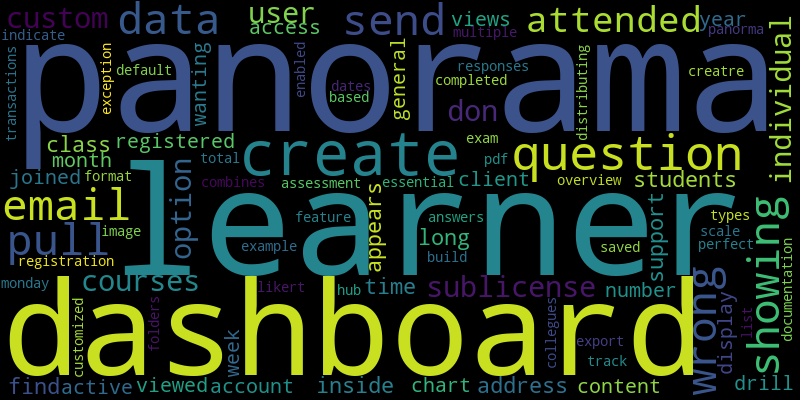

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=100, contour_width=5, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(res_string)

# Visualize the word cloud
wordcloud.to_image()

** **
### Create the Corpus and Dictionary
** **

In [32]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 2), (10, 1), (11, 1), (12, 1), (13, 1)], [(5, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1)], [(17, 1), (38, 1), (39, 1), (40, 2)], [(5, 1), (17, 1), (41, 1), (42, 1)], [(24, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 3)], [(17, 1), (53, 1), (54, 1), (55, 2), (56, 1)], [(57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(2, 1), (5, 1), (26, 1), (36, 1), (39, 1), (55, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(5, 1), (17, 1), (35, 2), (47, 1)], [(54, 1), (55, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(3, 1), (73, 1), (74, 1), (75, 1), (76, 2)], [(3, 1), (76, 1), (77, 1), (78, 1)], [(79, 1), (80, 1), (81, 1)], [(71, 1), (82, 1), (83, 1), (84, 1)], [(35, 1), (85, 1), (8

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).
For example, (0, 1) above implies word id 0 occurs once in the first document. (9,2) implies word 9 occurs twice, etc. 

** **
### Perform Baseline Model Tranining using LDA 
** **

In [33]:
from pprint import pprint

# number of topics (subjective and based on what you know about the possible topics in the documents)
num_topics = 5

# number of iterations
num_iterations = 20

# number of passes
num_passes = 20

# Build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,passes=num_passes,iterations=num_iterations,
                                       num_topics=num_topics, per_word_topics=True)

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.055*"learners" + 0.055*"pull" + 0.055*"questions" + 0.055*"wrong" + '
  '0.038*"showing" + 0.020*"individual" + 0.020*"create" + 0.020*"content" + '
  '0.020*"registered" + 0.020*"week"'),
 (1,
  '0.053*"panorama" + 0.053*"create" + 0.053*"attended" + 0.053*"dashboard" + '
  '0.029*"sublicense" + 0.029*"multiple" + 0.029*"combines" + 0.029*"users" + '
  '0.029*"general" + 0.029*"access"'),
 (2,
  '0.066*"dashboard" + 0.065*"don" + 0.036*"custom" + 0.036*"enabled" + '
  '0.036*"panorma" + 0.036*"default" + 0.036*"transactions" + '
  '0.036*"documentation" + 0.036*"hub" + 0.036*"total"'),
 (3,
  '0.097*"send" + 0.066*"email" + 0.037*"format" + 0.037*"image" + 0.037*"pdf" '
  '+ 0.037*"folders" + 0.037*"saved" + 0.037*"dashboards" + 0.037*"collegues" '
  '+ 0.037*"monday"'),
 (4,
  '0.069*"panorama" + 0.053*"learners" + 0.053*"data" + 0.036*"courses" + '
  '0.036*"panoramas" + 0.036*"create" + 0.020*"essential" + 0.020*"based" + '
  '0.020*"completed" + 0.020*"perfect"')]


The above LDA model is built with 5 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.  
You can see the keywords for each topic and the weightage(importance) of each keyword 

### Compute Model Perplexity and Baseline Coherence Score

In [34]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBaseline Coherence Score: ', coherence_lda)

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Baseline Coherence Score:  0.4850039667537186


Coherence measures the relative distance between words within a topic with a value between 0 < x < 1. The overall coherence score of a topic is the average of the distances between words. A ~.6 or higher indicates a strong topic correlation. 

** **
### Model Tuning
With the coherence score calculated for our baseline LDA model (no tuning), we can perform a series of sensitivity tests to determine the optimal parameters for tuning the final model that will result in the highest coherence score. In doing so, we will identify the optimal number of topics, along with the alpha and beta parameters.

* Number of Topics
* alpha: Document-Topic Density
* beta: Word-Topic Density

In [35]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


** **
#### Set the min and max number of topics to iterate through
**  **

In [36]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 6
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/Users/toddboes/Documents/lda_tuning_results.csv', index=False)
    pbar.close()

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 240/240 [09:13<00:00,  2.30s/it]


** **
### Produce Final Model 
We will use the number of topics, alpha and beta parameters from the tuning output (csv) that yielded the highest coherence 
** **

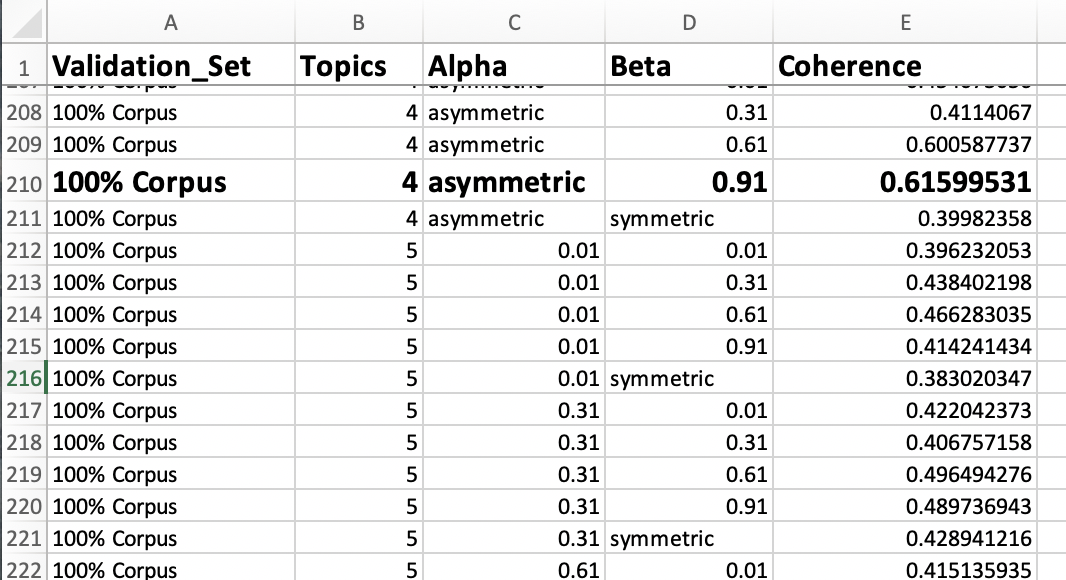

**  **
### Run Final Model with Tuned Parameters
**  **

In [37]:
num_topics = 4
alpha ='asymmetric'
eta =.91

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=eta)

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"learners" + 0.039*"panorama" + 0.024*"create" + 0.019*"dashboard" + '
  '0.019*"pull" + 0.019*"questions" + 0.019*"wrong" + 0.019*"showing" + '
  '0.019*"data" + 0.014*"individual"'),
 (1,
  '0.041*"send" + 0.031*"email" + 0.020*"monday" + 0.020*"example" + '
  '0.020*"collegues" + 0.020*"distributing" + 0.020*"feature" + 0.010*"pdf" + '
  '0.010*"format" + 0.010*"folders"'),
 (2,
  '0.032*"dashboard" + 0.021*"combines" + 0.021*"multiple" + 0.021*"custom" + '
  '0.021*"create" + 0.010*"folders" + 0.010*"format" + 0.010*"image" + '
  '0.010*"pdf" + 0.010*"saved"'),
 (3,
  '0.011*"saved" + 0.011*"folders" + 0.011*"format" + 0.011*"pdf" + '
  '0.011*"image" + 0.011*"dashboards" + 0.011*"total" + 0.011*"transactions" + '
  '0.011*"customized" + 0.011*"list"')]


/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nFinal Coherence Score: ', coherence_lda)

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Final Coherence Score:  0.6159953096928842


#### As a result of the model tuning, we increased the coherence score from the baseline .48 to .61 - a 27% increase indicating a strong topic correlation.

** **
### Visualize Final Model using LDAvis
Interactive web-based visualization of the topic model. LDAvis computes various summary statistics as input to
an interactive visualization built using D3 with the goal to help interpret the topics in the LDA topic model.
** **

In [40]:
# import pyLDAvis.gensim
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/toddboes/Documents/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, R=30, sort_topics=True)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/Users/toddboes/Documents/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/toddboes/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.023121 -0.001633       1        1  82.206690
1     -0.020195 -0.002090       2        1   9.583278
2     -0.001364  0.006814       3        1   6.256549
3     -0.001563 -0.003091       4        1   1.953483, topic_info=         Term      Freq     Total Category  logprob  loglift
55  dashboard  2.000000  2.000000  Default  30.0000  30.0000
17     create  3.000000  3.000000  Default  29.0000  29.0000
3       email  1.000000  1.000000  Default  28.0000  28.0000
76       send  1.000000  1.000000  Default  27.0000  27.0000
54     custom  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
71        don  0.028149  1.817084   Topic4  -4.5325  -0.2319
54     custom  0.028148  1.370005   Topic4  -4.5325   0.0505
9    attended  0.028148  1.817326   Topic4  -4.5325  -0.2321
39    courses  0.028148  1.817201   Topic4  -4.5326  -0.2320
58     option  0.028147  1.273416   Topic4  -4.5326   0.1236

[179 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
14        1  0.784620       account
38        1  0.785387        active
9         1  1.100518      attended
15        1  0.784621         chart
16        1  0.784621       content
39        1  1.100594       courses
17        1  0.996829        create
54        1  0.729924        custom
91        1  0.786120    customized
55        1  0.782179     dashboard
88        1  0.786240    dashboards
2         1  0.847159          data
41        1  0.785646         dates
82        1  0.785728       default
18        1  0.784621       display
71        1  1.100665           don
19        1  0.784620         drill
3         1  0.646859         email
83        1  0.785726       enabled
87        1  0.786051        export
89        1  0.786242       folders
79        1  0.786242        format
80        1  0.786241         image
47        1  1.100228    individual
20        1  0.784621        joined
21        1  0.784621       learner
5         1  0.881447      learners
57        1  0.785290        likert
92        1  0.786119          list
22        1  0.784621         month
23        1  0.784621        number
58        1  0.785289        option
35        1  0.881653      panorama
40        1  1.100665     panoramas
84        1  0.785726       panorma
81        1  0.786243           pdf
24        1  0.846540          pull
50        1  0.846559     questions
25        1  0.784621    registered
42        1  0.785647  registration
59        1  0.785290     responses
90        1  0.786241         saved
60        1  0.785290         scale
76        2  0.878196          send
26        1  0.846710       showing
36        1  1.100412    sublicense
85        1  0.786122         total
61        1  0.785290         track
86        1  0.786121  transactions
62        1  0.785290         types
27        1  0.784620        viewed
28        1  0.784621         views
29        1  0.784621       wanting
30        1  0.784621          week
52        1  0.846559         wrong
31        1  0.784620          year, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

** **
## Click for an interactive LDAvis web visualization: https://rtboes.github.io/
** **

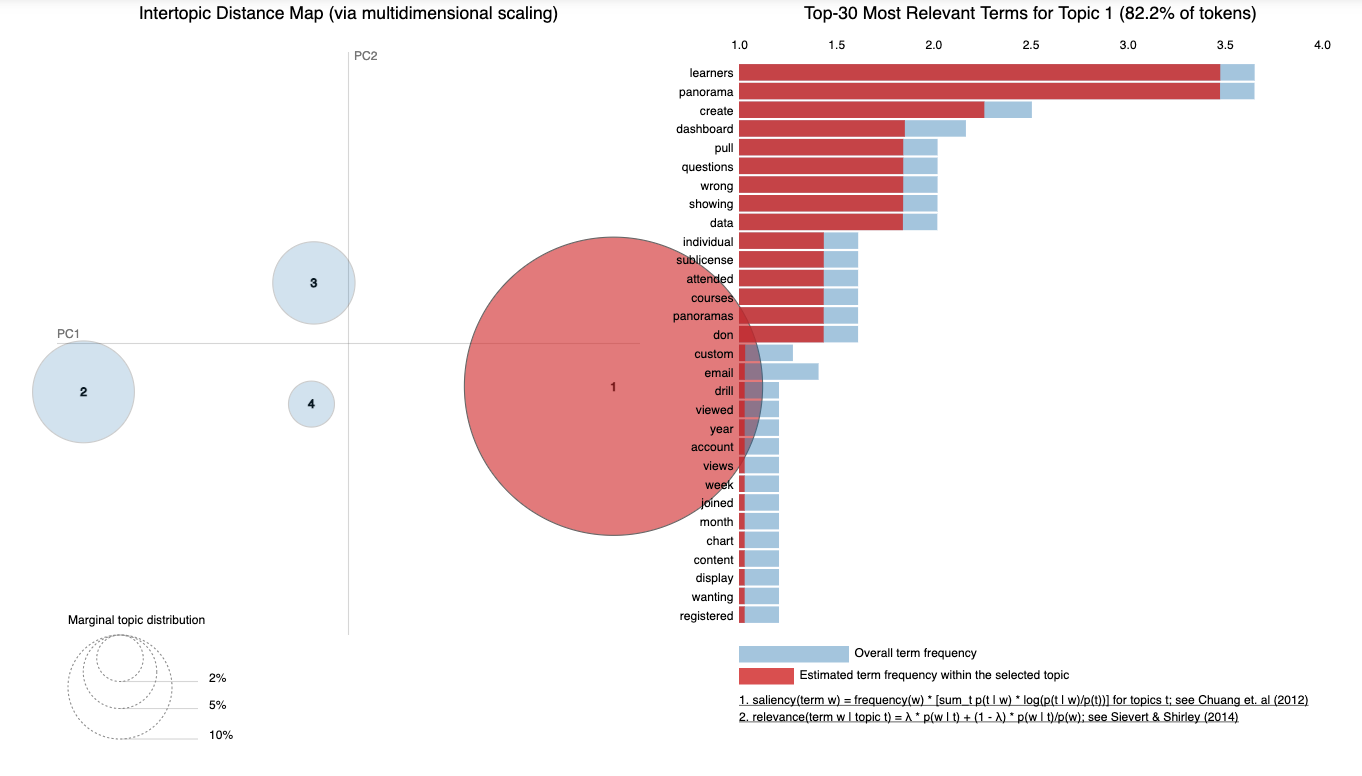

### LDAvis Explained
LDAvis attempts to answer a few basic questions about a fitted topic model:

1. What is the meaning of each topic?
2. How prevalent is each topic?
3. How do the topics relate to each other?

The visualization has two basic components. 

The left panel presents a global view of the topic model, and answers questions 2 and 3. In this view, the topics are plotted as circles in the two-dimensional plane whose centers are determined by computing the distance between topics, and then using multidimensional scaling to project the intertopic distances onto two dimensions.  Each topic’s overall prevalence is then encoded using the areas of the circles, where topics are sorted in decreasing order of prevalence. 

The right panel of the visualization depicts a horizontal barchart whose bars represent the individual terms that are the most useful for interpreting the currently selected topic on the left, and answers question 1, “What is the meaning of each topic?”. A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term. 

The left and right panels of the visualization are linked such that selecting a topic (on the left) reveals the most useful terms (on the right) for interpreting the selected topic. In addition, selecting a term (on the right) reveals the conditional distribution over topics (on the left) for the selected term. This kind of linked selection allows the examination of a large number of topic-term relationships in a compact manner.

The λ slider on the top allows for the ranking of terms according to term relevance. By default, the terms of a topic are ranked in decreasing order according their topic-specific probability ( λ = 1 ). Moving the slider allows to adjust the rank of terms based on much discriminatory (or "relevant") are for the specific topic. The suggested “optimal” value of λ is 0.6.

pyLDAvis API Documentation  
https://pyldavis.readthedocs.io/en/latest/modules/API.html#pyLDAvis.save_html

** **
### What's Next?
* Run model against a larger set of tickets
* Test model on other Ti product facets in the document corpus
* Determine the model and configuration settings exposed and not-exposed required for customer-specific environments
* Explore different visualizations for surfacing and interpreting the topic model outputs
** **

##  References & Resources

###### Topic Modeling
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Topic Modeling in Python: Latent Dirichlet Allocation (LDA) https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
3. Evaluate Topic Models in LDA. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
4. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
5. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
6. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf

###### Open Source Topic Modeling Libraries (Python & R)
* Gensim - https://radimrehurek.com/gensim/
* NLTK - https://www.nltk.org/
* SpaCy - https://spacy.io/
* Scikit - https://scikit-learn.org/stable/
* Topicmodels - https://cran.r-project.org/web/packages/topicmodels/index.html

###### Cloud Services & APIs
* Amazon Comprehend - https://docs.aws.amazon.com/comprehend/latest/dg/topic-modeling.html
* IBM Watson
* Google Cloud NLP
* Azure Cognitive Text Analytics
* Aylien
* MeaningCloud
* BigML
* MonkeyLearn


###### Zendesk Resources
* Support APIs
https://developer.zendesk.com/rest_api/docs/support/tickets
https://developer.zendesk.com/rest_api/docs/support/ticket_comments
* Help Center APIs
https://developer.zendesk.com/rest_api/docs/help_center/votes


###### Help Guide Search Report
https://support.zendesk.com/hc/en-us/articles/203664476-analyzing-help-center-search-results-professional-and-enterprise-?page=3
Note: in the Zendesk community comments Zendesk states that there are no current plans of making the search queries available via API
